# FINAL PROJECT

## Exploratory Data Analysis


In [1]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd

### Load annotations

In [6]:
col_names = ["image_name", "x1", "y1", "x2", "y2", "class", "image_width", "image_height"]

labels_train = pd.read_csv('/home/app/src/datasets/SKU-110K/annotations/annotations_train.csv', names=col_names)
labels_val = pd.read_csv('/home/app/src/datasets/SKU-110K/annotations/annotations_val.csv', names=col_names)
labels_test = pd.read_csv('/home/app/src/datasets/SKU-110K/annotations/annotations_test.csv', names=col_names)

frames = [labels_train, labels_val, labels_test]

labels = pd.concat(frames)

labels.head()

,image_name,x1,y1,x2,y2,class,image_width,image_height
0,train_0.jpg,208,537,422,814,object,3024,3024
1,train_0.jpg,1268,1923,1365,2209,object,3024,3024
2,train_0.jpg,1135,2074,1261,2166,object,3024,3024
3,train_0.jpg,1045,2085,1122,2258,object,3024,3024
4,train_0.jpg,976,2036,1040,2177,object,3024,3024


In [7]:
labels.loc[labels['image_name'] == 'test_1398.jpg']

,image_name,x1,y1,x2,y2,class,image_width,image_height
65002,test_1398.jpg,2014,1931,2146,2053,object,3264,2448
65003,test_1398.jpg,2036,1832,2167,1928,object,3264,2448
65004,test_1398.jpg,1902,1819,2015,1927,object,3264,2448
65005,test_1398.jpg,666,1756,744,1841,object,3264,2448
65006,test_1398.jpg,749,1774,846,1858,object,3264,2448
...,...,...,...,...,...,...,...,...
65140,test_1398.jpg,2253,1119,2644,1260,object,3264,2448
65141,test_1398.jpg,1898,1112,2244,1231,object,3264,2448
65142,test_1398.jpg,1527,1082,1873,1203,object,3264,2448
65143,test_1398.jpg,1198,1080,1520,1168,object,3264,2448


## Show a random image with their bounding boxes

In [11]:
images_path = '/home/app/src/datasets/SKU-110K/images'

images = os.listdir(images_path)

rdm_image = random.choice(images)

In [12]:
rdm_image

'test_58.jpg'

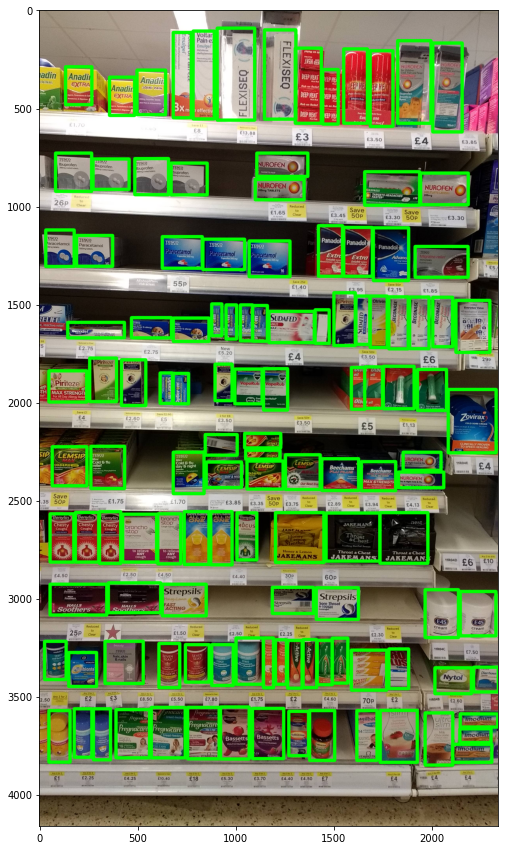

In [13]:
# Get bounding boxes
gt_bb = labels.loc[labels['image_name'] == rdm_image]

# Load a random image
img = cv2.imread(os.path.join(images_path, rdm_image))
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Bounding boxes color
color = (0, 255, 0)
   
# Line thickness of -1 px
# Thickness of -1 will fill the entire shape
thickness = 15

for _, bb in gt_bb.iterrows():
    # Start coordinate, here (100, 50)
    # represents the top left corner of rectangle
    start_point = (bb['x1'], bb['y1'])
   
    # Ending coordinate, here (125, 80)
    # represents the bottom right corner of rectangle
    end_point = (bb['x2'], bb['y2'])
   
    # Using cv2.rectangle() method
    # Draw a rectangle of black color of thickness -1 px
    img_rgb = cv2.rectangle(img_rgb, start_point, end_point, color, thickness)
    cv2.rectangle()

# Display
fig = plt.figure(figsize = (15,15))
plt.imshow(img_rgb)
plt.show()

In [14]:
print(start_point)

(908, 92)


**Important Note:** An image loaded using OpenCV is just a Numpy array, keep in mind you can make use of all the numpy functionalities you know here.

**Important Note:** OpenCV uses BGR format while matplotlib uses RGB.